In [1]:
import pandas as pd
import numpy as np

In [2]:
train_values = pd.read_csv(r'D:\DS\Heart attack prediction\train_values.csv') #enter your file path
train_labels = pd.read_csv(r'D:\DS\Heart attack prediction\train_labels.csv') #enter your file path

In [3]:
train_values.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0


In [4]:
train_labels.head(2)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0


In [5]:
data = train_values.merge(train_labels, how='left', on= 'patient_id')

In [6]:
data.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [7]:
#we will use 80% data to train and 20% to test the mode.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state=0)

In [8]:
#we will use this test set to test and validate our model so we need to drop heart_disease_present column.
test.drop('heart_disease_present', axis=1, inplace=True)

C:\Users\Sadiq\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
#if you don't want to see the above warning please run following comand
import warnings
warnings.filterwarnings('ignore')

In [10]:
train.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
55,jwqi3k,1,normal,130,3,0,0,0,233,0.4,1,44,179,1,0
83,v52zcs,2,reversible_defect,128,4,2,0,2,259,3.0,1,58,130,1,1


In [11]:
train.shape

(144, 15)

In [12]:
print('Total number of patient:',train.patient_id.nunique())

Total number of patient: 144


1    52.083333
2    43.055556
3     4.861111
Name: slope_of_peak_exercise_st_segment, dtype: float64


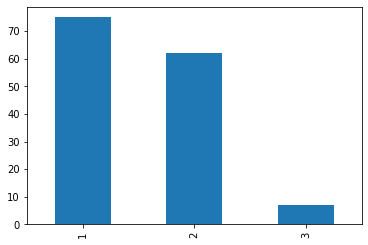

In [15]:
import matplotlib.pyplot as plt
print(train.slope_of_peak_exercise_st_segment.value_counts(normalize=True)*100)
train.slope_of_peak_exercise_st_segment.value_counts().plot(kind='bar')

In [14]:
pd.pivot_table(train, columns='slope_of_peak_exercise_st_segment', values='heart_disease_present', aggfunc=[sum, len,'mean'])

sum        len             mean            \
slope_of_peak_exercise_st_segment   1   2  3   1   2  3         1         2   
heart_disease_present              23  39  6  75  62  7  0.306667  0.629032   

                                             
slope_of_peak_exercise_st_segment         3  
heart_disease_present              0.857143

### slope_of_peak_exercise_st_segment 3 has 85.71% heart disease. Where only 30.66% of slope_of_peak_exercise_st_segment 1 has heart disease.

normal               54.861111
reversible_defect    41.666667
fixed_defect          3.472222
Name: thal, dtype: float64


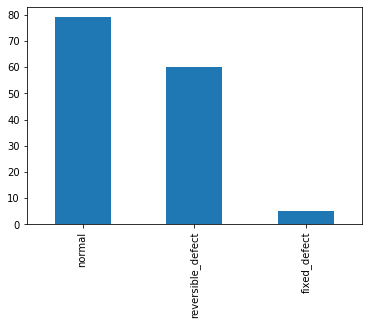

In [17]:
print(train.thal.value_counts(normalize=True)*100)
train.thal.value_counts().plot(kind='bar')

In [19]:
pd.pivot_table(train, columns='thal', values='heart_disease_present', aggfunc=[sum, len,'mean'])

sum                                   len  \
thal                  fixed_defect normal reversible_defect fixed_defect   
heart_disease_present            3     18                47            5   

                                                       mean            \
thal                  normal reversible_defect fixed_defect    normal   
heart_disease_present     79                60          0.6  0.227848   

                                         
thal                  reversible_defect  
heart_disease_present          0.783333

## 78.33% patient have heart_disease_present if they have reversible_defect

In [30]:
train[(train.thal=='reversible_defect') & (train.slope_of_peak_exercise_st_segment==3)]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
62,pwigd8,3,reversible_defect,130,4,0,1,2,283,1.6,1,56,103,1,1
128,syvayq,3,reversible_defect,145,4,0,0,0,174,2.6,1,70,125,1,1
32,k7ef7h,3,reversible_defect,140,4,0,1,2,203,3.1,1,53,155,1,1
82,37c0vm,3,reversible_defect,110,2,0,0,0,229,1.0,1,48,168,0,1
140,noxsnw,3,reversible_defect,140,4,0,0,0,217,5.6,1,55,111,1,1


## Those who has slope_of_peak_exercise_st_segment 3 and reversible defect all of them has heart_disease_present